In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Wedge
import matplotlib.patches as patches
import pymongo
import os

# Configurar estilo profesional
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [2]:
client = pymongo.MongoClient(os.getenv('MONGO_URI'))
db = client[os.getenv('MONGO_DATABASE')]
collection = db['scrapy_bogota_apartments_processed']

apartments = pd.DataFrame(list(collection.find()))
apartments = apartments.drop(columns=['_id'], axis=1)
apartments = apartments.loc[(apartments['tipo_operacion'] == 'VENTA') & (apartments['coords_modified'] == False)]

C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\2350590956.py:96: UserWarning: Glyph 128647 (\N{METRO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\2350590956.py:96: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\2350590956.py:96: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\2350590956.py:96: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\2350590956.py:96: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\2350590956.py:96: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erik1

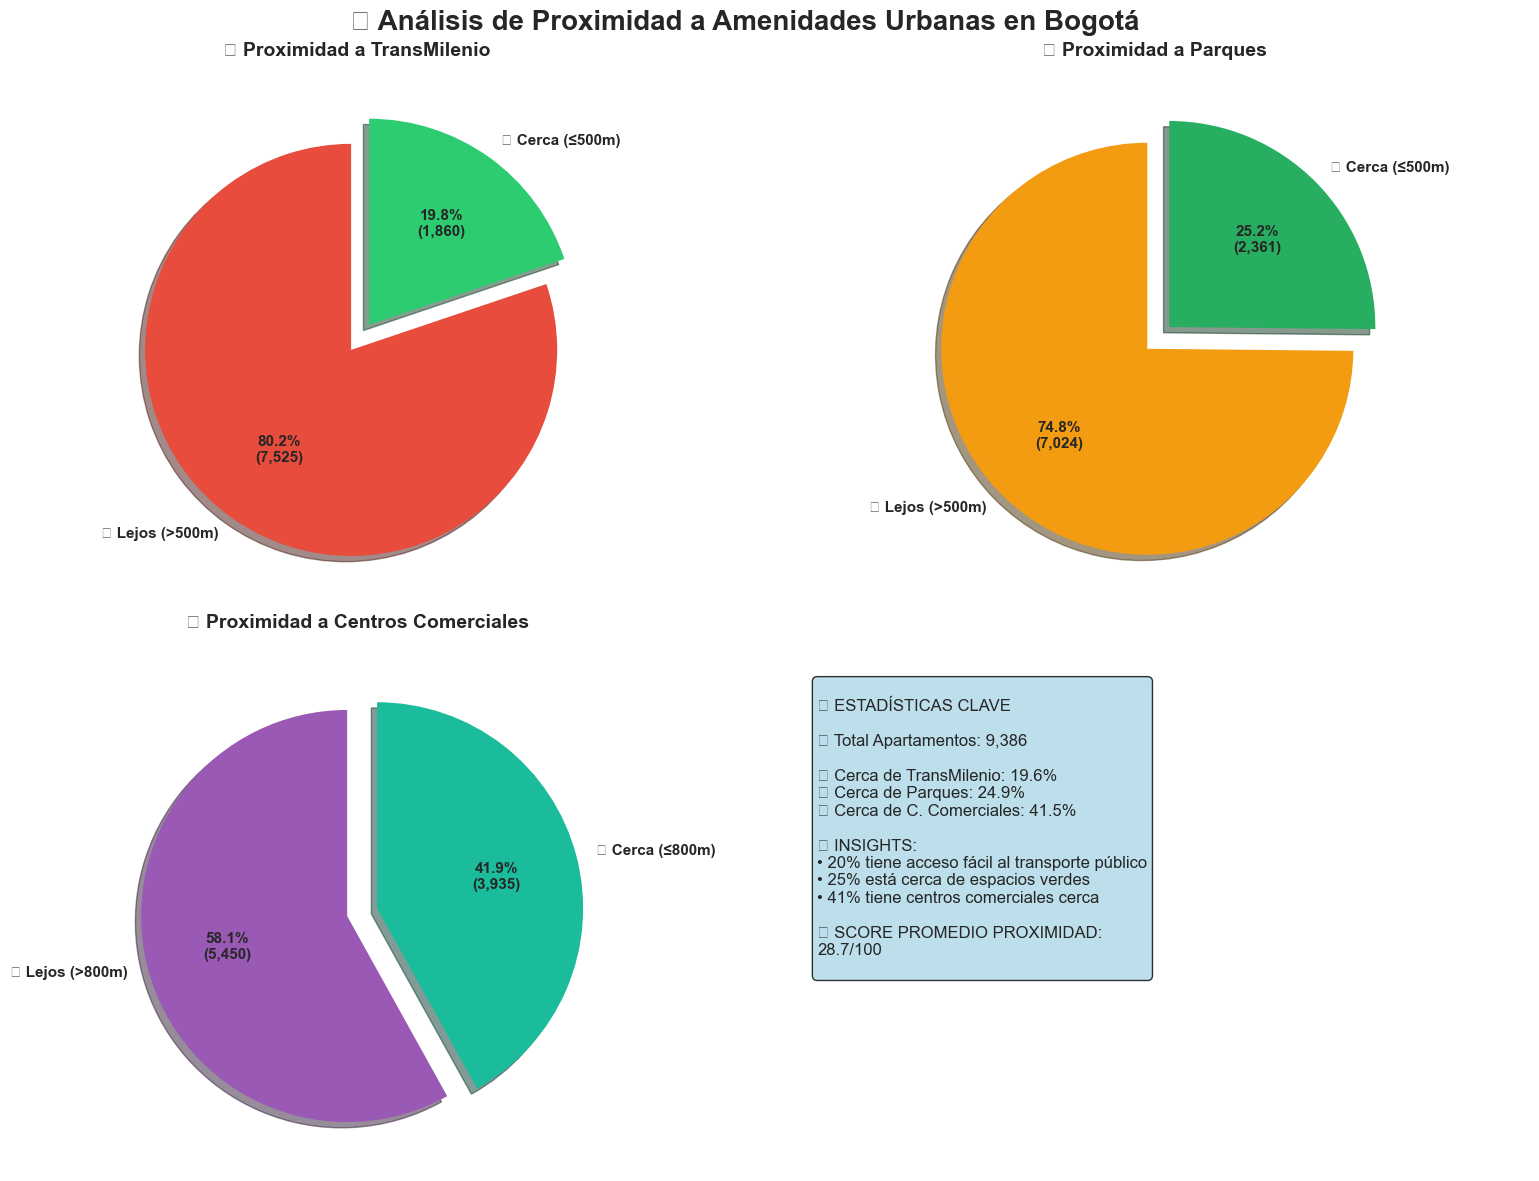

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Análisis de Proximidad a Amenidades Urbanas en Bogotá', 
             fontsize=20, fontweight='bold', y=0.98)

# Colores profesionales
colors_tm = ['#E74C3C', '#2ECC71']  # Rojo para "No", Verde para "Sí"
colors_parks = ['#F39C12', '#27AE60']  # Naranja para "No", Verde para "Sí"
colors_malls = ['#9B59B6', '#1ABC9C']  # Púrpura para "No", Turquesa para "Sí"

# --- TRANSMILENIO ---
tm_counts = apartments['is_cerca_estacion_tm'].value_counts()
total_apartments = len(apartments)

wedges1, texts1, autotexts1 = ax1.pie(
    tm_counts.values, 
    labels=['🚫 Lejos (>500m)', '🚇 Cerca (≤500m)'],
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*total_apartments):,})',
    startangle=90,
    colors=colors_tm,
    explode=(0.05, 0.1),
    shadow=True,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)

ax1.set_title('🚇 Proximidad a TransMilenio', fontsize=14, fontweight='bold', pad=20)

# --- PARQUES ---
if 'is_cerca_parque' in apartments.columns:
    parks_counts = apartments['is_cerca_parque'].value_counts()
    wedges2, texts2, autotexts2 = ax2.pie(
        parks_counts.values,
        labels=['🚫 Lejos (>500m)', '🌳 Cerca (≤500m)'],
        autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*total_apartments):,})',
        startangle=90,
        colors=colors_parks,
        explode=(0.05, 0.1),
        shadow=True,
        textprops={'fontsize': 11, 'fontweight': 'bold'}
    )
    ax2.set_title('🌳 Proximidad a Parques', fontsize=14, fontweight='bold', pad=20)
else:
    ax2.text(0.5, 0.5, 'Datos de parques\nno disponibles', 
             ha='center', va='center', fontsize=12, transform=ax2.transAxes)
    ax2.set_title('🌳 Proximidad a Parques', fontsize=14, fontweight='bold', pad=20)

# --- CENTROS COMERCIALES ---
if 'is_cerca_centro_comercial' in apartments.columns:
    malls_counts = apartments['is_cerca_centro_comercial'].value_counts()
    wedges3, texts3, autotexts3 = ax3.pie(
        malls_counts.values,
        labels=['🚫 Lejos (>800m)', '🏬 Cerca (≤800m)'],
        autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*total_apartments):,})',
        startangle=90,
        colors=colors_malls,
        explode=(0.05, 0.1),
        shadow=True,
        textprops={'fontsize': 11, 'fontweight': 'bold'}
    )
    ax3.set_title('🏬 Proximidad a Centros Comerciales', fontsize=14, fontweight='bold', pad=20)
else:
    ax3.text(0.5, 0.5, 'Datos de centros\ncomerciales no disponibles', 
             ha='center', va='center', fontsize=12, transform=ax3.transAxes)
    ax3.set_title('🏬 Proximidad a Centros Comerciales', fontsize=14, fontweight='bold', pad=20)

# --- RESUMEN ESTADÍSTICO ---
ax4.axis('off')

# Calcular estadísticas
tm_cerca_pct = (tm_counts.get(1, 0) / total_apartments) * 100 if 1 in tm_counts else 0
parks_cerca_pct = (apartments['is_cerca_parque'].sum() / total_apartments) * 100 if 'is_cerca_parque' in apartments.columns else 0
malls_cerca_pct = (apartments['is_cerca_centro_comercial'].sum() / total_apartments) * 100 if 'is_cerca_centro_comercial' in apartments.columns else 0

# Texto de estadísticas
stats_text = f"""
📈 ESTADÍSTICAS CLAVE

🏠 Total Apartamentos: {total_apartments:,}

🚇 Cerca de TransMilenio: {tm_cerca_pct:.1f}%
🌳 Cerca de Parques: {parks_cerca_pct:.1f}%
🏬 Cerca de C. Comerciales: {malls_cerca_pct:.1f}%

💡 INSIGHTS:
• {tm_cerca_pct:.0f}% tiene acceso fácil al transporte público
• {parks_cerca_pct:.0f}% está cerca de espacios verdes
• {malls_cerca_pct:.0f}% tiene centros comerciales cerca

🎯 SCORE PROMEDIO PROXIMIDAD:
{(tm_cerca_pct + parks_cerca_pct + malls_cerca_pct)/3:.1f}/100
"""

ax4.text(0.05, 0.95, stats_text, transform=ax4.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", 
         facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.savefig('../visualizations/amenities_proximity_analysis.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\2055820344.py:49: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\2055820344.py:49: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\2055820344.py:49: UserWarning: Glyph 128647 (\N{METRO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\2055820344.py:49: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\2055820344.py:49: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\2055820344.py:50: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) Arial.
  plt.savefig('../visualizations/proximity_by_lo

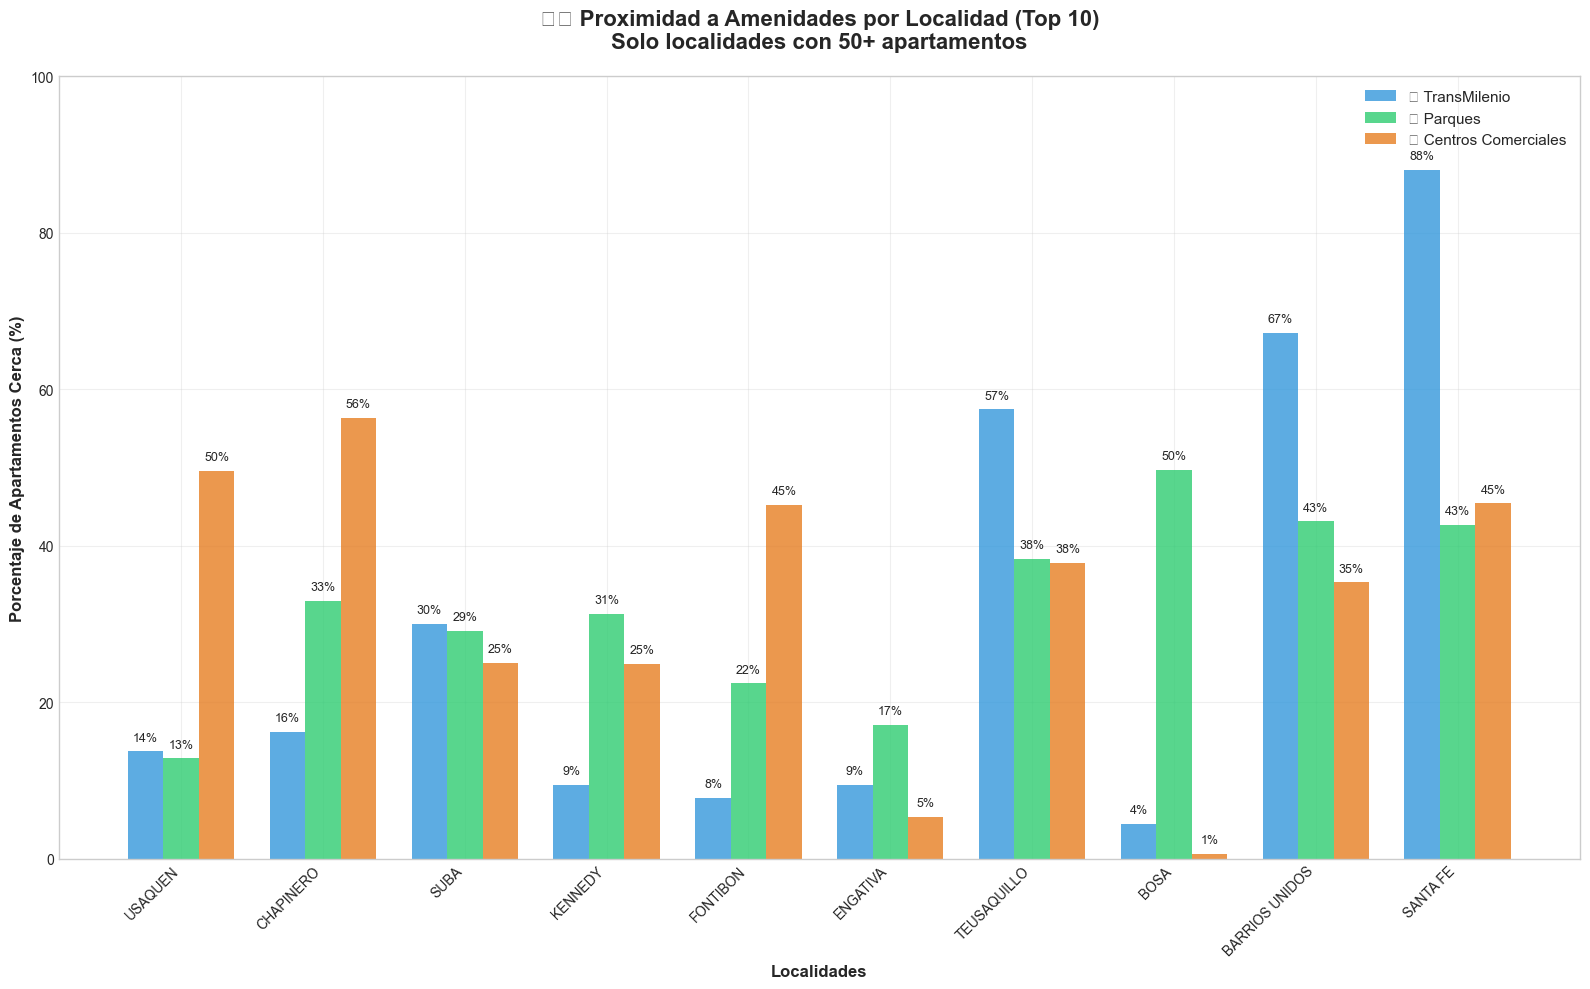

In [4]:
if 'localidad' in apartments.columns:
    fig, ax = plt.subplots(figsize=(16, 10))
    
    # Calcular proximidad por localidad
    proximity_by_localidad = apartments.groupby('localidad').agg({
        'is_cerca_estacion_tm': 'mean',
        'is_cerca_parque': 'mean' if 'is_cerca_parque' in apartments.columns else lambda x: 0,
        'is_cerca_centro_comercial': 'mean' if 'is_cerca_centro_comercial' in apartments.columns else lambda x: 0
    }).round(3) * 100
    
    # Solo mostrar localidades con más de 50 apartamentos
    counts_by_localidad = apartments['localidad'].value_counts()
    significant_localidades = counts_by_localidad[counts_by_localidad >= 50].index
    proximity_filtered = proximity_by_localidad.loc[significant_localidades].head(10)
    
    # Crear gráfico de barras agrupadas
    x = np.arange(len(proximity_filtered.index))
    width = 0.25
    
    bars1 = ax.bar(x - width, proximity_filtered['is_cerca_estacion_tm'], width, 
                   label='🚇 TransMilenio', color='#3498DB', alpha=0.8)
    bars2 = ax.bar(x, proximity_filtered['is_cerca_parque'], width,
                   label='🌳 Parques', color='#2ECC71', alpha=0.8)
    bars3 = ax.bar(x + width, proximity_filtered['is_cerca_centro_comercial'], width,
                   label='🏬 Centros Comerciales', color='#E67E22', alpha=0.8)
    
    # Personalización
    ax.set_xlabel('Localidades', fontsize=12, fontweight='bold')
    ax.set_ylabel('Porcentaje de Apartamentos Cerca (%)', fontsize=12, fontweight='bold')
    ax.set_title('🏙️ Proximidad a Amenidades por Localidad (Top 10)\n' + 
                 'Solo localidades con 50+ apartamentos', fontsize=16, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(proximity_filtered.index, rotation=45, ha='right')
    ax.legend(loc='upper right', fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 100)
    
    # Añadir valores en las barras
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{height:.0f}%', ha='center', va='bottom', fontsize=9)
    
    add_value_labels(bars1)
    add_value_labels(bars2)
    add_value_labels(bars3)
    
    plt.tight_layout()
    plt.savefig('../visualizations/proximity_by_localidad.png', 
                dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\1193336335.py:71: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\1193336335.py:71: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\1193336335.py:72: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.savefig('../visualizations/price_impact_transmilenio.png',
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\1193336335.py:72: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) Arial.
  plt.savefig('../visualizations/price_impact_transmilenio.png',
C:\Users\erik1\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\erik1\AppData\Roaming\Python\Python312\site-package

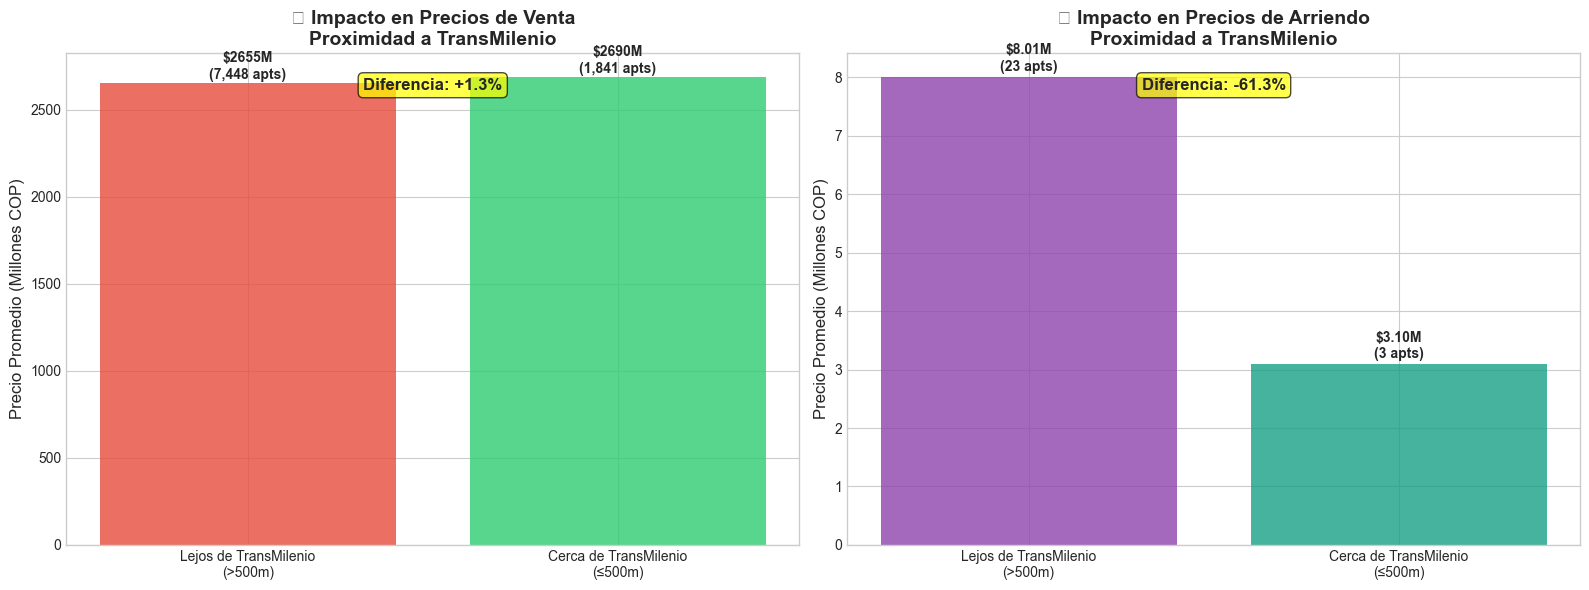

In [5]:
if 'precio_venta' in apartments.columns or 'precio_arriendo' in apartments.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Precio de venta
    if 'precio_venta' in apartments.columns:
        venta_data = apartments[apartments['precio_venta'].notna()]
        if len(venta_data) > 0:
            tm_impact_venta = venta_data.groupby('is_cerca_estacion_tm')['precio_venta'].agg(['mean', 'median', 'count'])
            
            categories = ['Lejos de TransMilenio\n(>500m)', 'Cerca de TransMilenio\n(≤500m)']
            means = [tm_impact_venta.loc[0, 'mean'] if 0 in tm_impact_venta.index else 0,
                    tm_impact_venta.loc[1, 'mean'] if 1 in tm_impact_venta.index else 0]
            counts = [tm_impact_venta.loc[0, 'count'] if 0 in tm_impact_venta.index else 0,
                     tm_impact_venta.loc[1, 'count'] if 1 in tm_impact_venta.index else 0]
            
            bars = ax1.bar(categories, [m/1e6 for m in means], 
                          color=['#E74C3C', '#2ECC71'], alpha=0.8)
            
            ax1.set_title('💰 Impacto en Precios de Venta\nProximidad a TransMilenio', 
                         fontsize=14, fontweight='bold')
            ax1.set_ylabel('Precio Promedio (Millones COP)', fontsize=12)
            
            # Añadir valores y conteos
            for i, (bar, count) in enumerate(zip(bars, counts)):
                height = bar.get_height()
                ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
                        f'${height:.0f}M\n({count:,} apts)', 
                        ha='center', va='bottom', fontsize=10, fontweight='bold')
            
            # Calcular diferencia
            if means[1] > 0 and means[0] > 0:
                diff_pct = ((means[1] - means[0]) / means[0]) * 100
                ax1.text(0.5, 0.95, f'Diferencia: {diff_pct:+.1f}%', 
                        transform=ax1.transAxes, ha='center', va='top',
                        bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                        fontsize=12, fontweight='bold')
    
    # Precio de arriendo
    if 'precio_arriendo' in apartments.columns:
        arriendo_data = apartments[apartments['precio_arriendo'].notna()]
        if len(arriendo_data) > 0:
            tm_impact_arriendo = arriendo_data.groupby('is_cerca_estacion_tm')['precio_arriendo'].agg(['mean', 'median', 'count'])
            
            means_arr = [tm_impact_arriendo.loc[0, 'mean'] if 0 in tm_impact_arriendo.index else 0,
                        tm_impact_arriendo.loc[1, 'mean'] if 1 in tm_impact_arriendo.index else 0]
            counts_arr = [tm_impact_arriendo.loc[0, 'count'] if 0 in tm_impact_arriendo.index else 0,
                         tm_impact_arriendo.loc[1, 'count'] if 1 in tm_impact_arriendo.index else 0]
            
            bars2 = ax2.bar(categories, [m/1e6 for m in means_arr], 
                           color=['#8E44AD', '#16A085'], alpha=0.8)
            
            ax2.set_title('🏠 Impacto en Precios de Arriendo\nProximidad a TransMilenio', 
                         fontsize=14, fontweight='bold')
            ax2.set_ylabel('Precio Promedio (Millones COP)', fontsize=12)
            
            # Añadir valores y conteos
            for i, (bar, count) in enumerate(zip(bars2, counts_arr)):
                height = bar.get_height()
                ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                        f'${height:.2f}M\n({count:,} apts)', 
                        ha='center', va='bottom', fontsize=10, fontweight='bold')
            
            # Calcular diferencia
            if means_arr[1] > 0 and means_arr[0] > 0:
                diff_pct_arr = ((means_arr[1] - means_arr[0]) / means_arr[0]) * 100
                ax2.text(0.5, 0.95, f'Diferencia: {diff_pct_arr:+.1f}%', 
                        transform=ax2.transAxes, ha='center', va='top',
                        bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                        fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../visualizations/price_impact_transmilenio.png', 
                dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

([0, 1, 2],
 [Text(0, 0, 'TransMilenio'),
  Text(1, 0, 'Parques'),
  Text(2, 0, 'Centros Comerciales')])

C:\Users\erik1\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\erik1\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


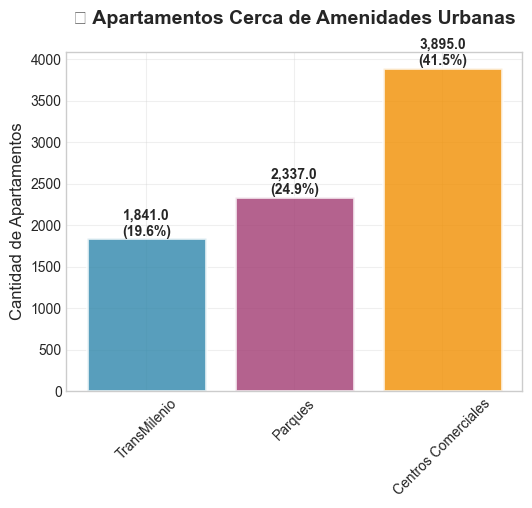

In [6]:
fig = plt.figure(figsize=(20, 15))

# Crear datos para el análisis
amenities_data = {
    'TransMilenio': apartments['is_cerca_estacion_tm'].sum() if 'is_cerca_estacion_tm' in apartments.columns else 0,
    'Parques': apartments['is_cerca_parque'].sum() if 'is_cerca_parque' in apartments.columns else 0,
    'Centros Comerciales': apartments['is_cerca_centro_comercial'].sum() if 'is_cerca_centro_comercial' in apartments.columns else 0
}

total_apartments = len(apartments)

# 1. Gráfico de barras comparativo de proximidad
ax1 = plt.subplot(3, 3, 1)
amenities_names = list(amenities_data.keys())
amenities_counts = list(amenities_data.values())
colors = ['#2E86AB', '#A23B72', '#F18F01']

bars = ax1.bar(amenities_names, amenities_counts, color=colors, alpha=0.8, edgecolor='white', linewidth=2)
ax1.set_title('📍 Apartamentos Cerca de Amenidades Urbanas', fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Cantidad de Apartamentos', fontsize=12)
ax1.grid(True, alpha=0.3)

# Agregar valores en las barras
for bar, count in zip(bars, amenities_counts):
    height = bar.get_height()
    percentage = (count / total_apartments) * 100
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)

In [7]:
import humanize

fotmat_tick_humanize = lambda x, pos: humanize.intword(x)

Columnas disponibles:
   - TransMilenio: True
   - Parques: True
   - Centros Comerciales: True


C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\824416356.py:86: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax.boxplot(box_data, labels=labels, patch_artist=True, showfliers=False)
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\824416356.py:86: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax.boxplot(box_data, labels=labels, patch_artist=True, showfliers=False)
C:\Users\erik1\AppData\Local\Temp\ipykernel_18496\824416356.py:86: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax.boxplot(box_data, labels=labels, patch_artist=True, showfliers=False)
C:\Users\erik1\AppData\Local\Temp\

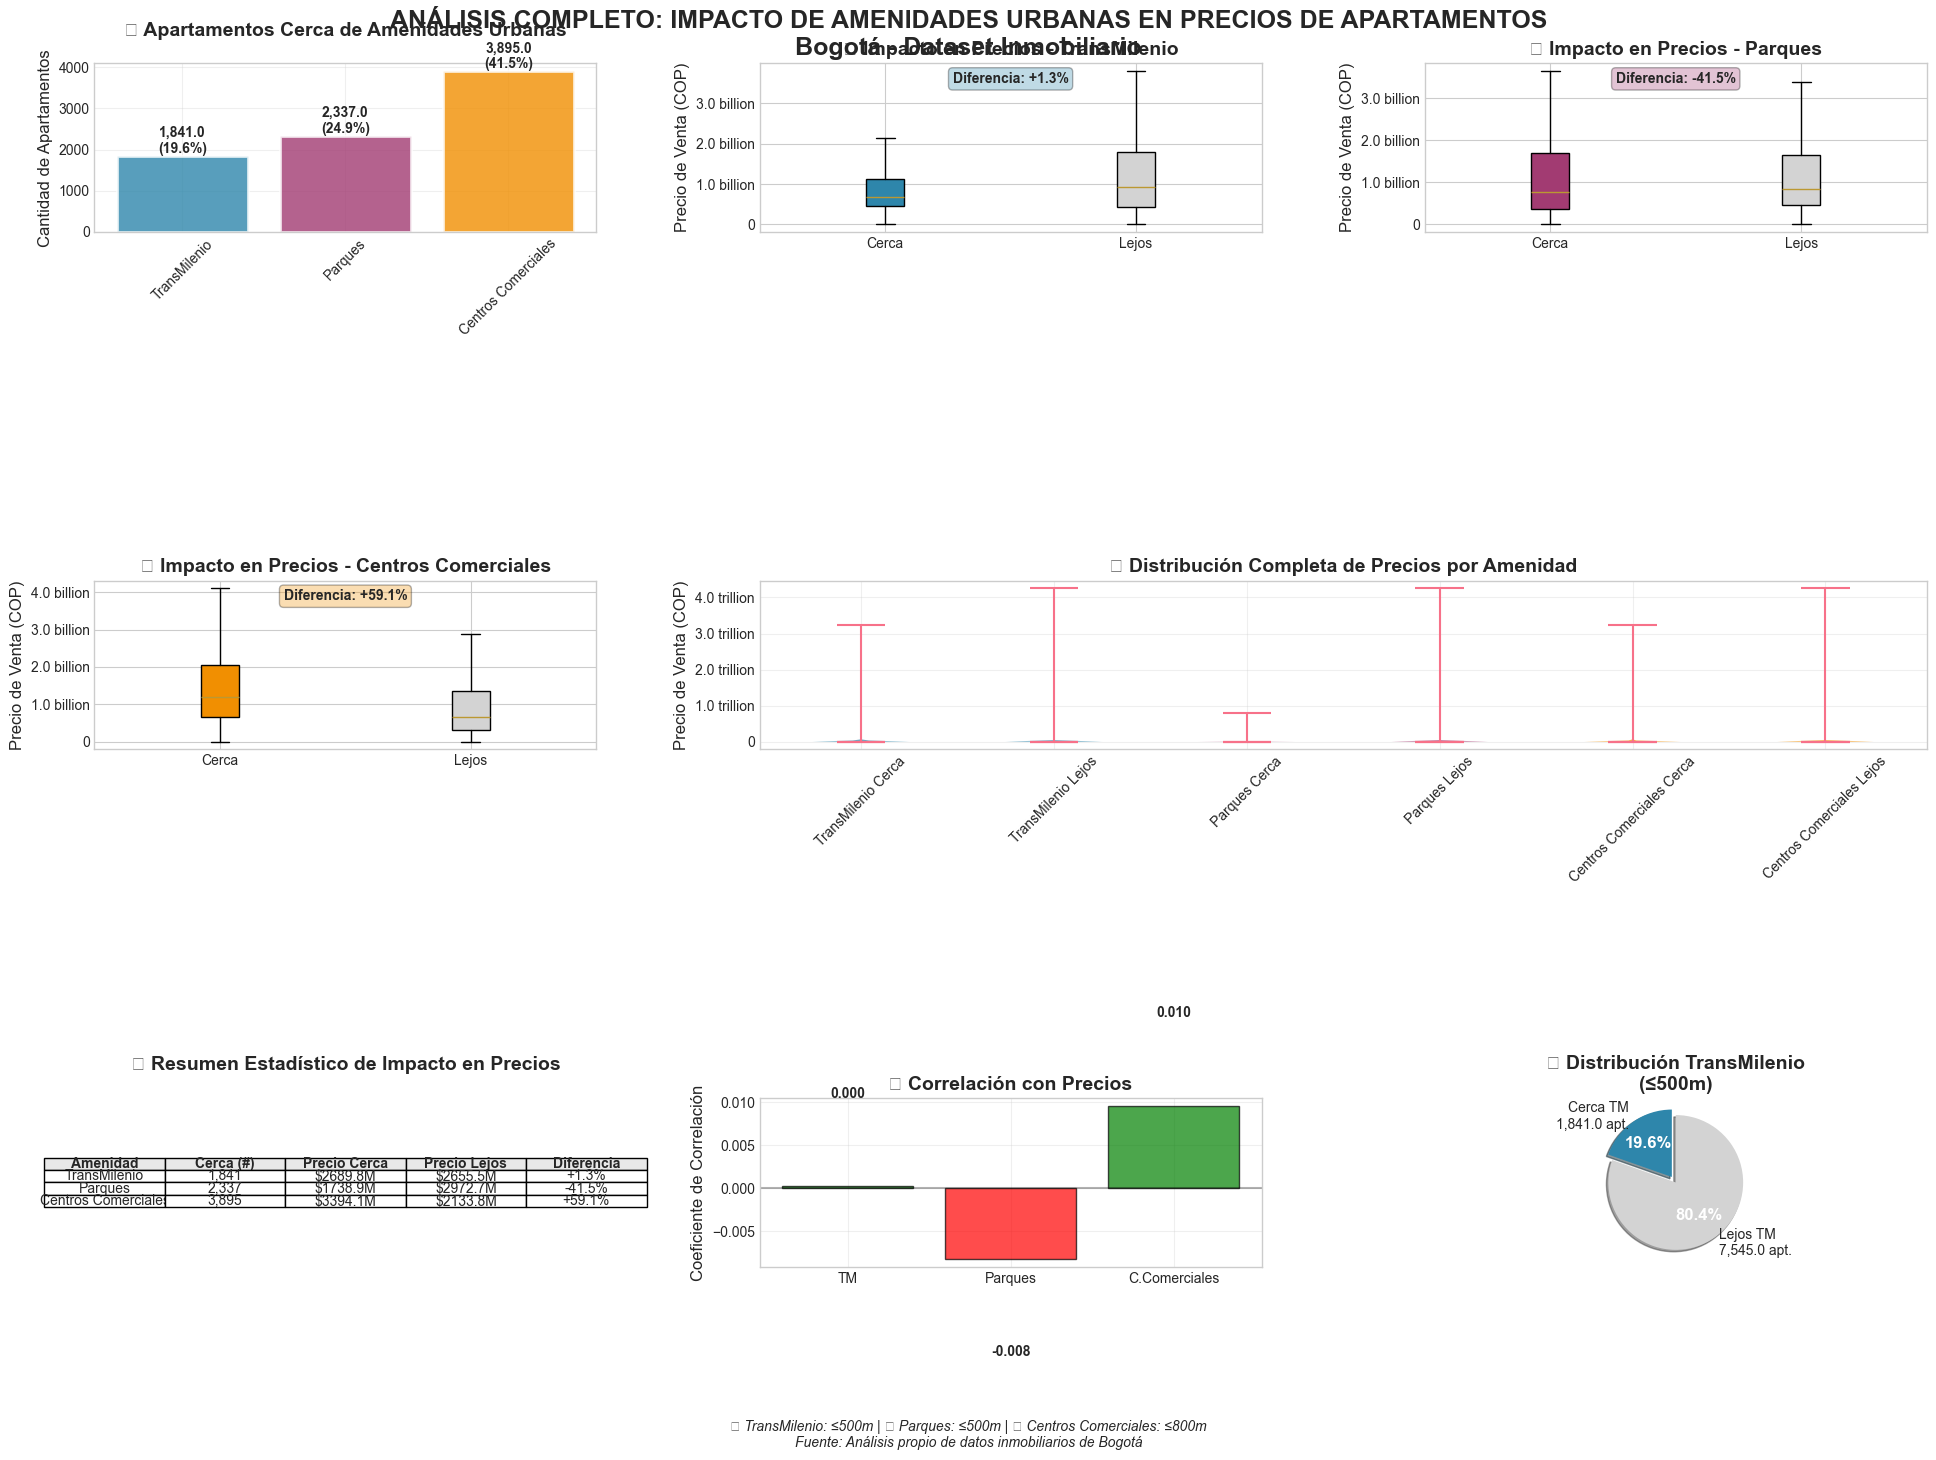

📊 RESUMEN EJECUTIVO - IMPACTO DE AMENIDADES EN PRECIOS

🎯 TRANSMILENIO:
   • Apartamentos cerca: 1,841 (19.6%)
   • Precio promedio cerca: $2,689,837,779
   • Precio promedio lejos: $2,655,450,286
   • Diferencia: +1.3%
   • Mediana cerca: $690,000,000
   • Mediana lejos: $915,000,000

🎯 PARQUES:
   • Apartamentos cerca: 2,337 (24.9%)
   • Precio promedio cerca: $1,738,916,564
   • Precio promedio lejos: $2,972,660,683
   • Diferencia: -41.5%
   • Mediana cerca: $780,000,000
   • Mediana lejos: $850,000,000

🎯 CENTROS COMERCIALES:
   • Apartamentos cerca: 3,895 (41.5%)
   • Precio promedio cerca: $3,394,052,758
   • Precio promedio lejos: $2,133,843,083
   • Diferencia: +59.1%
   • Mediana cerca: $1,200,000,000
   • Mediana lejos: $650,000,000



In [13]:
# =============================================================================
# ANÁLISIS COMPLETO DEL IMPACTO DE AMENIDADES URBANAS EN PRECIOS
# =============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configurar estilo profesional
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = 'white'

# =============================================================================
# CREAR DASHBOARD COMPLETO
# =============================================================================
fig = plt.figure(figsize=(20, 15))

# Verificar qué columnas existen
columns_available = {
    'TransMilenio': 'is_cerca_estacion_tm' in apartments.columns,
    'Parques': 'is_cerca_parque' in apartments.columns,
    'Centros Comerciales': 'is_cerca_centro_comercial' in apartments.columns
}

print("Columnas disponibles:")
for amenity, available in columns_available.items():
    print(f"   - {amenity}: {available}")

# =============================================================================
# 1. GRÁFICO COMPARATIVO DE PROXIMIDAD A AMENIDADES
# =============================================================================
ax1 = plt.subplot(3, 3, 1)
amenities_data = {}
total_apartments = len(apartments)

# Solo agregar amenidades que existen
if columns_available['TransMilenio']:
    amenities_data['TransMilenio'] = apartments['is_cerca_estacion_tm'].sum()
if columns_available['Parques']:
    amenities_data['Parques'] = apartments['is_cerca_parque'].sum()
if columns_available['Centros Comerciales']:
    amenities_data['Centros Comerciales'] = apartments['is_cerca_centro_comercial'].sum()

if amenities_data:
    amenities_names = list(amenities_data.keys())
    amenities_counts = list(amenities_data.values())
    colors = ['#2E86AB', '#A23B72', '#F18F01'][:len(amenities_names)]
    
    bars = ax1.bar(amenities_names, amenities_counts, color=colors, alpha=0.8, edgecolor='white', linewidth=2)
    ax1.set_title('📍 Apartamentos Cerca de Amenidades Urbanas', fontsize=14, fontweight='bold', pad=20)
    ax1.set_ylabel('Cantidad de Apartamentos', fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Agregar valores en las barras
    for bar, count in zip(bars, amenities_counts):
        height = bar.get_height()
        percentage = (count / total_apartments) * 100
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                 f'{count:,}\n({percentage:.1f}%)',
                 ha='center', va='bottom', fontweight='bold')
    
    plt.xticks(rotation=45)

# =============================================================================
# 2-4. IMPACTO EN PRECIOS POR AMENIDAD
# =============================================================================
subplot_positions = [2, 3, 4]
colors_impact = ['#2E86AB', '#A23B72', '#F18F01']
amenity_columns = ['is_cerca_estacion_tm', 'is_cerca_parque', 'is_cerca_centro_comercial']
amenity_titles = ['💰 Impacto en Precios - TransMilenio', '🌳 Impacto en Precios - Parques', '🏬 Impacto en Precios - Centros Comerciales']

for i, (col, title, color, pos) in enumerate(zip(amenity_columns, amenity_titles, colors_impact, subplot_positions)):
    if col in apartments.columns:
        ax = plt.subplot(3, 3, pos)
        
        # Crear boxplot
        cerca_data = apartments[apartments[col] == True]['precio_venta'].dropna()
        lejos_data = apartments[apartments[col] == False]['precio_venta'].dropna()
        
        if len(cerca_data) > 0 and len(lejos_data) > 0:
            box_data = [cerca_data, lejos_data]
            labels = ['Cerca', 'Lejos']
            
            box_plot = ax.boxplot(box_data, labels=labels, patch_artist=True, showfliers=False)
            
            # Colorear las cajas
            box_plot['boxes'][0].set_facecolor(color)
            box_plot['boxes'][1].set_facecolor('#D3D3D3')  # Using standard light gray color
            
            ax.set_title(title, fontsize=14, fontweight='bold')
            ax.set_ylabel('Precio de Venta (COP)', fontsize=12)
            ax.yaxis.set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
            
            # Calcular estadísticas
            mean_cerca = cerca_data.mean()
            mean_lejos = lejos_data.mean()
            diferencia = ((mean_cerca - mean_lejos) / mean_lejos) * 100
            
            ax.text(0.5, 0.95, f'Diferencia: {diferencia:+.1f}%', 
                     transform=ax.transAxes, ha='center', va='top',
                     bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.3),
                     fontweight='bold')

# =============================================================================
# 5. DISTRIBUCIÓN DE PRECIOS COMPARATIVA (VIOLINES)
# =============================================================================
ax5 = plt.subplot(3, 3, (5, 6))

# Preparar datos para violin plot
violin_data = []
labels = []
colors_violin = []

for col, color, name in zip(amenity_columns, colors_impact, amenities_names):
    if col in apartments.columns:
        cerca_data = apartments[apartments[col] == True]['precio_venta'].dropna()
        lejos_data = apartments[apartments[col] == False]['precio_venta'].dropna()
        
        if len(cerca_data) > 0 and len(lejos_data) > 0:
            violin_data.extend([cerca_data, lejos_data])
            labels.extend([f'{name} Cerca', f'{name} Lejos'])
            colors_violin.extend([color, color + '40'])  # Color sólido y transparente

if violin_data:
    parts = ax5.violinplot(violin_data, showmeans=True, showmedians=True)
    
    # Colorear los violines
    for i, pc in enumerate(parts['bodies']):
        if i < len(colors_violin):
            pc.set_facecolor(colors_violin[i])
            pc.set_alpha(0.7)
    
    ax5.set_xticks(range(1, len(labels) + 1))
    ax5.set_xticklabels(labels, rotation=45)
    ax5.set_title('🎻 Distribución Completa de Precios por Amenidad', fontsize=14, fontweight='bold')
    ax5.set_ylabel('Precio de Venta (COP)', fontsize=12)
    ax5.yaxis.set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
    ax5.grid(True, alpha=0.3)

# =============================================================================
# 6. TABLA RESUMEN DE ESTADÍSTICAS
# =============================================================================
ax6 = plt.subplot(3, 3, 7)
ax6.axis('off')

# Crear tabla de estadísticas
stats_data = []

for amenity, col in zip(amenities_names, amenity_columns):
    if col in apartments.columns:
        cerca = apartments[apartments[col] == True]['precio_venta']
        lejos = apartments[apartments[col] == False]['precio_venta']
        
        if len(cerca) > 0 and len(lejos) > 0:
            mean_cerca = cerca.mean()
            mean_lejos = lejos.mean()
            diff_pct = ((mean_cerca - mean_lejos) / mean_lejos) * 100
            
            stats_data.append([
                amenity,
                f'{len(cerca):,}',
                f'${mean_cerca/1e6:.1f}M',
                f'${mean_lejos/1e6:.1f}M',
                f'{diff_pct:+.1f}%'
            ])

if stats_data:
    table = ax6.table(cellText=stats_data,
                     colLabels=['Amenidad', 'Cerca (#)', 'Precio Cerca', 'Precio Lejos', 'Diferencia'],
                     cellLoc='center',
                     loc='center')
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    
    # Colorear el header
    for i in range(5):
        table[(0, i)].set_facecolor('#E8E8E8')
        table[(0, i)].set_text_props(weight='bold')

ax6.set_title('📊 Resumen Estadístico de Impacto en Precios', fontsize=14, fontweight='bold', pad=20)

# =============================================================================
# 7. GRÁFICO DE CORRELACIÓN
# =============================================================================
ax7 = plt.subplot(3, 3, 8)

# Calcular correlaciones con precio
correlations = {}
for amenity, col in zip(['TM', 'Parques', 'C.Comerciales'], amenity_columns):
    if col in apartments.columns:
        # Convertir a numérico y manejar NaN
        numeric_col = pd.to_numeric(apartments[col], errors='coerce')
        corr = numeric_col.corr(apartments['precio_venta'])
        correlations[amenity] = corr

if correlations:
    amenities = list(correlations.keys())
    corr_values = list(correlations.values())
    colors_corr = ['green' if x > 0 else 'red' for x in corr_values]
    
    bars = ax7.bar(amenities, corr_values, color=colors_corr, alpha=0.7, edgecolor='black')
    ax7.set_title('📈 Correlación con Precios', fontsize=14, fontweight='bold')
    ax7.set_ylabel('Coeficiente de Correlación', fontsize=12)
    ax7.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax7.grid(True, alpha=0.3)
    
    # Agregar valores
    for bar, value in zip(bars, corr_values):
        height = bar.get_height()
        ax7.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height > 0 else -0.01),
                f'{value:.3f}', ha='center', va='bottom' if height > 0 else 'top',
                fontweight='bold')

# =============================================================================
# 8. PIE CHART MEJORADO - TRANSMILENIO
# =============================================================================
ax8 = plt.subplot(3, 3, 9)

if 'is_cerca_estacion_tm' in apartments.columns:
    cerca_tm = apartments['is_cerca_estacion_tm'].sum()
    lejos_tm = len(apartments) - cerca_tm
    
    sizes = [cerca_tm, lejos_tm]
    labels = [f'Cerca TM\n{cerca_tm:,} apt.', f'Lejos TM\n{lejos_tm:,} apt.']
    colors = ['#2E86AB', '#D3D3D3']  # Using standard light gray color
    explode = (0.1, 0)
    
    wedges, texts, autotexts = ax8.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                                      explode=explode, shadow=True, startangle=90)
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(12)
    
    ax8.set_title('🚊 Distribución TransMilenio\n(≤500m)', fontsize=14, fontweight='bold')

plt.tight_layout(pad=3.0)
plt.suptitle('ANÁLISIS COMPLETO: IMPACTO DE AMENIDADES URBANAS EN PRECIOS DE APARTAMENTOS\nBogotá - Dataset Inmobiliario', 
             fontsize=18, fontweight='bold', y=0.98)

# Agregar nota al pie con umbrales específicos
if 'is_cerca_centro_comercial' in apartments.columns:
    note_text = '📍 TransMilenio: ≤500m | 🌳 Parques: ≤500m | 🏬 Centros Comerciales: ≤800m\nFuente: Análisis propio de datos inmobiliarios de Bogotá'
else:
    note_text = '📍 TransMilenio: ≤500m | 🌳 Parques: ≤500m\nFuente: Análisis propio de datos inmobiliarios de Bogotá'

fig.text(0.5, 0.02, note_text, ha='center', va='bottom', fontsize=10, style='italic')

plt.savefig('../visualizations/analisis_completo_amenidades_precios.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# =============================================================================
# ESTADÍSTICAS ADICIONALES IMPRESAS
# =============================================================================
print("=" * 80)
print("📊 RESUMEN EJECUTIVO - IMPACTO DE AMENIDADES EN PRECIOS")
print("=" * 80)

# Solo mostrar estadísticas para columnas que existen
for amenity, col in zip(['TRANSMILENIO', 'PARQUES', 'CENTROS COMERCIALES'], amenity_columns):
    if col in apartments.columns:
        cerca = apartments[apartments[col] == True]['precio_venta']
        lejos = apartments[apartments[col] == False]['precio_venta']
        
        if len(cerca) > 0 and len(lejos) > 0:
            print(f"\n🎯 {amenity}:")
            print(f"   • Apartamentos cerca: {len(cerca):,} ({len(cerca)/len(apartments)*100:.1f}%)")
            print(f"   • Precio promedio cerca: ${cerca.mean():,.0f}")
            print(f"   • Precio promedio lejos: ${lejos.mean():,.0f}")
            print(f"   • Diferencia: {((cerca.mean() - lejos.mean()) / lejos.mean()) * 100:+.1f}%")
            print(f"   • Mediana cerca: ${cerca.median():,.0f}")
            print(f"   • Mediana lejos: ${lejos.median():,.0f}")

print("\n" + "=" * 80)